In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
#nltk.download('punkt')

In [3]:
# data_1 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 35 CSV.csv", encoding='latin-1')
# data_2 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 37 CSV.csv", encoding='latin-1')
# data_3 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 38 CSV.csv", encoding='latin-1')
# data_4 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 39 CSV.csv", encoding='latin-1')
# data = data_1.append(data_2, ignore_index=True)
# data = data.append(data_3, ignore_index=True)
# data = data.append(data_4, ignore_index=True)
data = pd.read_csv("D:/GPMT/Merged/USA-1/data_2018_joined_deu.csv")
data.head()

C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,23,25,26,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ageGroup,articleId,colorGroup,colors,companyName,consumerRating,countryName,currency,currentPrice,...,CURRENT_PRICE_IN_EUR_OUTPUT,INITIAL_PRICE_IN_SELECTED_CURRENCY_OUTPUT,CURRENT_PRICE_IN_SELECTED_CURRENCY_OUTPUT,SELECTED_CURRENCY_OUTPUT,PRODUCT_INTRODUCTION_DATE_OUTPUT,DISCOUNTED_SINCE_OUTPUT,PRODUCT_EXIT_DATE_OUTPUT,PRODUCT_DESCRIPTION_OUTPUT,PRODUCT_URL_OUTPUT,IMAGE_SERVER_URL_OUTPUT
0,0,adults,101640,White,White / Black,adidas,0.0,usa,USD,18.0,...,15.66,15.66,15.66,EUR,1/1/2018,Not discounted yet,2/12/2018,Six pairs of cushioned training socks. These m...,https://www.adidas.com/us/us/quarter-socks-6-p...,http://usporamap287.am.adsint.biz/zoomimages/2...
1,1,adults,101640,White,White / Black,adidas,0.0,usa,USD,18.0,...,15.66,15.66,15.66,EUR,1/1/2018,Not discounted yet,2/12/2018,Six pairs of cushioned training socks. These m...,https://www.adidas.com/us/us/quarter-socks-6-p...,http://usporamap287.am.adsint.biz/zoomimages/2...
2,2,adults,101640,White,White / Black,adidas,0.0,usa,USD,18.0,...,15.66,15.66,15.66,EUR,1/1/2018,Not discounted yet,2/12/2018,Six pairs of cushioned training socks. These m...,https://www.adidas.com/us/us/quarter-socks-6-p...,http://usporamap287.am.adsint.biz/zoomimages/2...
3,3,adults,101640,White,White / Black,adidas,0.0,usa,USD,18.0,...,15.66,15.66,15.66,EUR,1/1/2018,Not discounted yet,2/12/2018,Six pairs of cushioned training socks. These m...,https://www.adidas.com/us/us/quarter-socks-6-p...,http://usporamap287.am.adsint.biz/zoomimages/2...
4,4,adults,101640,White,White / Black,adidas,0.0,usa,USD,18.0,...,15.66,15.66,15.66,EUR,1/1/2018,Not discounted yet,2/12/2018,Six pairs of cushioned training socks. These m...,https://www.adidas.com/us/us/quarter-socks-6-p...,http://usporamap287.am.adsint.biz/zoomimages/2...


In [4]:
data.isnull().sum()

Unnamed: 0                                        0
ageGroup                                      23614
articleId                                         0
colorGroup                                    42327
colors                                        10480
companyName                                       0
consumerRating                                    0
countryName                                       0
currency                                          0
currentPrice                                      0
date                                              0
description                                    7537
discountedSince                              512483
distributorName                                   0
division                                         26
gender                                        23599
imageUrl                                        369
initialPrice                                      0
language                                          0
modelNumber 

In [5]:
#data.key

In [6]:
data.columns

Index(['Unnamed: 0', 'ageGroup', 'articleId', 'colorGroup', 'colors',
       'companyName', 'consumerRating', 'countryName', 'currency',
       'currentPrice', 'date', 'description', 'discountedSince',
       'distributorName', 'division', 'gender', 'imageUrl', 'initialPrice',
       'language', 'modelNumber', 'ped', 'pid', 'price', 'productGroup',
       'productName', 'sportsCategory', 'subBrand', 'technologies',
       'territories', 'type', 'type5', 'url', 'key', 'COMPANY',
       'COUNTRY_OUTPUT', 'DISTRIBUTOR_OUTPUT', 'ARTICLE_ID_OUTPUT',
       'MODEL_NUMBER_OUTPUT', 'ARTICLE_NAME_OUTPUT', 'SUBBRAND_OUTPUT',
       'SPORTS_CATEGORY_OUTPUT', 'PRODUCT_DIVISION_OUTPUT',
       'PRODUCT_GROUP_OUTPUT', 'PRODUCT_TYPE_OUTPUT', 'FRANCHISE_OUTPUT',
       'TECHNOLOGIES_OUTPUT', 'COLOUR_GROUP_OUTPUT', 'COLOUR_OUTPUT',
       'GENDER_OUTPUT', 'AGE_GROUP_OUTPUT', 'CONSUMER_RATING_OUTPUT',
       'INITIAL_PRICE_IN_LOCAL_CURRENCY_OUTPUT',
       'CURRENT_PRICE_IN_LOCAL_CURRENCY_OUTPUT', 'LOCA

In [7]:
data.language.unique()

array(['en-US'], dtype=object)

In [8]:
data.subBrand.unique()

array(['Sport', nan, 'Originals', 'Sport inspired', 'essentials',
       'Sport Inspired', 'adidas by stella mccartney', 'Essentials',
       'sport inspired', 'Performance', 'Sportswear', 'Converse',
       'Collections', 'Jordan'], dtype=object)

In [9]:
# Filtering US and UK
#data = data.loc[data["language"].isin(['de-DE'])]

In [10]:
#data.group.unique()

In [11]:
data_req = data.loc[:,["companyName", "description", "division","sportsCategory", "subBrand", "gender", "url", "ageGroup", "distributorName", "SUBBRAND_OUTPUT"]]

In [12]:
data_req = data_req.drop_duplicates()

In [13]:
len(data_req)

137035

In [14]:
data_req_x = data_req.loc[:,["companyName", "description", "division","sportsCategory", "subBrand", "gender", "url", "ageGroup", "distributorName"]]
data_req_y = data_req.loc[:, ["SUBBRAND_OUTPUT"]]

In [15]:
data_req_x = data_req_x.fillna("unknown")
data_req = pd.concat([data_req_x, data_req_y], axis=1)

In [16]:
len(data_req)

137035

In [17]:
data_req = data_req.dropna()

In [18]:
data_req = data_req.drop_duplicates()

In [19]:
#data_req["description"]  = data_req["companyName"] +" " + data_req["description"] +" " + data_req["division"] +" " + data_req["sportsCategory"] +" " + data_req["subBrand"]+" " + data_req["gender"]+" " + data_req["url"]+" " + data_req["sportsCategory"]+" " + data_req["ageGroup"]+" " + data_req["distributorName"]
data_req["description"]  = data_req["description"]+" " + data_req["url"]

In [20]:
#data_req = data_req.drop(["companyName", "division","sportsCategory", "subBrand", "gender", "url", "ageGroup", "distributorName"], axis = 1)
data_req = data_req.drop(["url"], axis = 1)

In [21]:
#data_req.columns = ["description", "subBrand"]
data_req = data_req.rename(columns= {'subBrand' : 'subBrand_input', 'SUBBRAND_OUTPUT' : 'subBrand'})

In [22]:
data_req.subBrand.unique()

array(['Performance', 'Sport Inspired'], dtype=object)

In [23]:
len(data_req)

137035

In [24]:
data_req = data_req.drop_duplicates()

In [25]:
# data_req.subBrand = data_req.subBrand.str.lower()
# data_req.description = data_req.description.str.lower()

In [26]:
data_req = data_req.apply(lambda x: x.astype(str).str.lower())

In [27]:
data_req["subBrand_input"] = "input_" + data_req["subBrand_input"].astype(str)
data_req["division"] = "input_" + data_req["division"].astype(str)
data_req["sportsCategory"] = "input_" + data_req["sportsCategory"].astype(str)
data_req["gender"] = "input_" + data_req["gender"].astype(str)
data_req["ageGroup"] = "input_" + data_req["ageGroup"].astype(str)
data_req["distributorName"] = "input_" + data_req["distributorName"].astype(str)

In [28]:
description = data_req.description
subBrand = data_req.subBrand
data_req = data_req.drop(["description"], axis=1)

In [29]:
data_req = pd.concat([pd.get_dummies(data_req[col]) for col in data_req], axis=1)

In [30]:
data_req = pd.concat([data_req, subBrand, description], axis=1)

In [31]:
data_req.subBrand.unique()

array(['performance', 'sport inspired'], dtype=object)

In [32]:
lens = data_req.description.str.len()
lens.mean(), lens.std(), lens.max()

(468.4818841901704, 285.24365463405866, 4162)

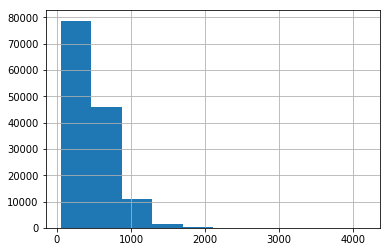

In [33]:
lens.hist();

In [34]:
data_req = data_req.dropna()

In [35]:
len(data_req)

137035

In [36]:
#one_hot = pd.get_dummies(data_req.subBrand)

In [37]:
label_cols = data_req.subBrand.dropna().unique()

In [38]:
label_cols

array(['performance', 'sport inspired'], dtype=object)

In [39]:
minCount = 10
subBrand_minCount = pd.DataFrame((data_req.subBrand.value_counts() > minCount).reset_index())

In [40]:
subBrand_drop = subBrand_minCount.loc[subBrand_minCount["subBrand"] == False]

In [41]:
subBrand_drop

,index,subBrand


In [42]:
label_cols = np.setdiff1d(label_cols, subBrand_drop["index"])

In [43]:
#data_req = pd.concat([data_req, one_hot], axis=1)

In [44]:
data_req.head()

,adidas,nike,puma,reebok,input_accessories,input_clothing,input_shoes,input_unknown,input_baseball,input_baseball / softball,...,input_junior,input_kids,input_little kids,input_unknown,input_youth,input_own ecom,performance,sport inspired,subBrand,description
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,performance,six pairs of cushioned training socks. these m...
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,performance,six pairs of cushioned training socks. these m...
7,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,performance,the bulldogs ultimate tee is new for men's foo...
10,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,performance,the bulldogs ultimate tee is new for men's foo...
14,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,performance,the aggies ultimate tee is new for men's footb...


In [45]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [46]:
description = "description"

In [47]:
#data_req = data_req.drop(subBrand_drop["index"], axis = 1)

In [48]:
np.random.seed(123)
data_req_sample = data_req.sample(frac=0.7)

In [49]:
train = data_req.loc[data_req.index.isin(data_req_sample.index)]
test = data_req.loc[~data_req.index.isin(data_req_sample.index)]

In [50]:
test_subBrand = test.subBrand

In [51]:
test_subBrand.head()

0     performance
10    performance
14    performance
18    performance
49    performance
Name: subBrand, dtype: object

In [52]:
train = train.drop("subBrand", axis = 1)
test = test.drop("subBrand", axis = 1)

In [53]:
#test.head()

In [54]:
# token_dict = {}
# stemmer = PorterStemmer()

# def stem_tokens(tokens, stemmer):
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     stems = stem_tokens(tokens, stemmer)
#     return stems

In [55]:
from stop_words import get_stop_words
stop_words_english = get_stop_words('english')
# stop_words_german = get_stop_words('german')

In [56]:
#stop_words_english.append(stop_words_german)

In [57]:
#stop_words_english

In [58]:
# stop_words_english = sorted(set(map(tuple, stop_words_english)), reverse=True)

In [59]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words = None )
trn_term_doc = vec.fit_transform(train[description])
test_term_doc = vec.transform(test[description])

In [60]:
trn_term_doc, test_term_doc

(<95924x224597 sparse matrix of type '<class 'numpy.float64'>'
 	with 14357720 stored elements in Compressed Sparse Row format>,
 <41111x224597 sparse matrix of type '<class 'numpy.float64'>'
 	with 6071695 stored elements in Compressed Sparse Row format>)

In [61]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [62]:
x = trn_term_doc
test_x = test_term_doc

In [63]:
train.head()

,adidas,nike,puma,reebok,input_accessories,input_clothing,input_shoes,input_unknown,input_baseball,input_baseball / softball,...,input_infant,input_junior,input_kids,input_little kids,input_unknown,input_youth,input_own ecom,performance,sport inspired,description
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,six pairs of cushioned training socks. these m...
7,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,the bulldogs ultimate tee is new for men's foo...
17,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,the aggies ultimate tee is new for men's footb...
21,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,the cardinals ultimate tee is new for men's fo...
28,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,the wolfpack ultimate tee is new for men's foo...


In [64]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
#     x_nb = np.hstack((x_nb, train.input_performance))
    return m.fit(x_nb, y), r

In [87]:
x[1==0].sum(0)

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [106]:
# r = np.log(pr('1','0') / pr('0','1'))
#x_nb = x.multiply(r)
#np.hstack((x_nb, train.input_performance))
#x_nb.toarray

In [107]:
#y

In [84]:
from sklearn.linear_model import LogisticRegression

In [100]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit performance


TypeError: float() argument must be a string or a number, not 'coo_matrix'

In [75]:
preds.shape

(41111, 2)

In [76]:
predictions = pd.DataFrame(preds, columns = label_cols)

In [77]:
test.index = np.arange(0, len(test))
test_subBrand.index = np.arange(0, len(test))

In [78]:
len(test)

41111

In [79]:
submid = pd.DataFrame({'description': test["description"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [80]:
submission.head()

,description,performance,sport inspired
0,adidas six pairs of cushioned training socks. ...,0.999209,0.000791
1,adidas the bulldogs ultimate tee is new for me...,0.992302,0.007698
2,adidas the aggies ultimate tee is new for men'...,0.992943,0.007057
3,adidas the cardinals ultimate tee is new for m...,0.995962,0.004038
4,adidas a t-shirt for loyal fans of the houston...,0.999443,0.000557


In [81]:
final_pred = pd.concat([submission, test_subBrand.str.lower()],axis = 1)

In [82]:
test_subBrand.str.lower().value_counts()

performance       25802
sport inspired    15309
Name: subBrand, dtype: int64

In [83]:
final_pred["Predictions"] = final_pred[label_cols].idxmax(axis = 1)

In [84]:
# from mlxtend.evaluate import confusion_matrix

# y_target =    final_pred.subBrand
# y_predicted = final_pred.Predictions

# cm = confusion_matrix(y_target=y_target, 
#                       y_predicted=y_predicted, 
#                       binary=False)

In [85]:
# import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_confusion_matrix
# import numpy as np

# fig, ax = plot_confusion_matrix(conf_mat=cm)
# plt.show()

In [86]:
print(f'Accuracy Score : {accuracy_score(final_pred.subBrand, final_pred.Predictions)}')
print(f'F1 Score: {f1_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Precision: {precision_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Recall: {recall_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')

Accuracy Score : 0.9757972318844105
F1 Score: 0.9740477332334201
Precision: 0.975233032050224
Recall: 0.9729086249202404


In [68]:
#final_pred.to_csv("final_output_SubBrand_v4.csv", index_label=False, index=False)

In [83]:
len(final_pred)

20860

In [51]:
#test_subBrand

In [52]:
len(submission)

15062

In [54]:
#final_pred.isnull().sum()